In [2]:
import matplotlib.pyplot as plt
import numpy as np
url = 'http://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url, dtype=int, skiprows=1)
Y, H, L, C = data[:,0], data[:,1], data[:,2], data[:,3]

Plot the populations for the years in the period. Add legend and axis labels to the plot.

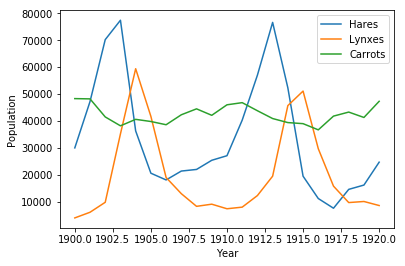

In [3]:
plt.plot (Y, H, label = 'Hares')
plt.plot (Y, L, label = 'Lynxes')
plt.plot (Y, C, label = 'Carrots')
plt.xlabel ("Year")
plt.ylabel ("Population")
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

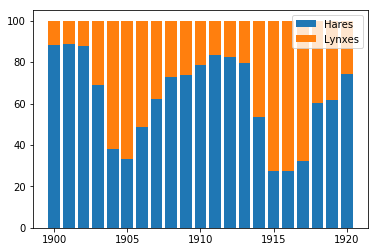

In [4]:
a, b = H/(H+L)*100, L/(H+L)*100
plt.bar (Y, a, label = 'Hares')
plt.bar (Y, b, bottom = a, label = 'Lynxes')
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

Hares: mean = 34080.95238095238 ; std = 20897.906458089667
Lynxes: mean = 20166.666666666668 ; std = 16254.591536908763
Carrots: mean = 42400.0 ; std = 3322.5062255844787


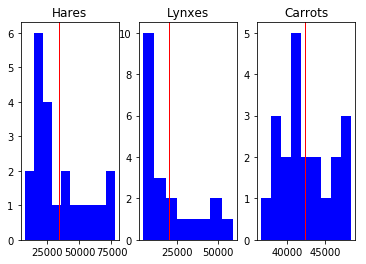

In [5]:
ax = plt.subplots (1, 3)[1]
ax[0].hist (H, bins = 10, color = 'b')
ax[0].set_title ('Hares')
mean = np.mean (H)
std = np.std (H)
ax[0].axvline (mean, linewidth = 1, color = 'r')
print ('Hares: mean =', mean, '; std =', std)

ax[1].hist (L, bins = 8, color = 'b')
ax[1].set_title ('Lynxes')
mean = np.mean (L)
std = np.std (L)
ax[1].axvline (mean, linewidth = 1, color = 'r')
print ('Lynxes: mean =', mean, '; std =', std)

ax[2].hist (C, bins = 9, color = 'b')
ax[2].set_title ('Carrots')
mean = np.mean (C)
std = np.std (C)
ax[2].axvline (mean, linewidth = 1, color = 'r')
print ('Carrots: mean =', mean, '; std =', std)

Find which year each species had the largest population. Mark these years in the plot of populations.

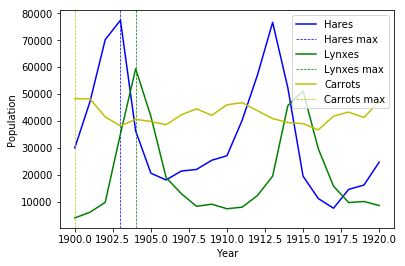

In [6]:
plt.plot (Y, H, label = 'Hares', color = 'b')
plt.axvline (Y[np.argmax(H)], linewidth = 0.7, color = 'b', label = 'Hares max', linestyle = '--')

plt.plot (Y, L, label = 'Lynxes', color = 'g')
plt.axvline (Y[np.argmax(L)], linewidth = 0.7, color = 'g', label = 'Lynxes max', linestyle = '--')

plt.plot (Y, C, label = 'Carrots', color = 'y')
plt.axvline (Y[np.argmax(C)], linewidth = 0.7, color = 'y', label = 'Carrots max', linestyle = '--')

plt.xlabel ("Year")
plt.ylabel ("Population")
plt.legend()
plt.show()


Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


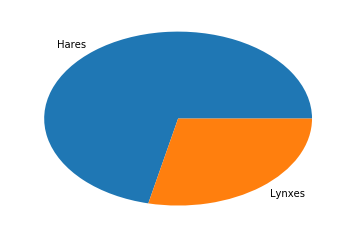

In [7]:
print (np.array (['L', 'H']) [(H > L).astype ('int')])
plt.pie (np.array ([np.count_nonzero (H>L), np.count_nonzero (H<L)]), labels = ['Hares', 'Lynxes'])
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

[1902 1903 1904 1912 1913 1914 1915]


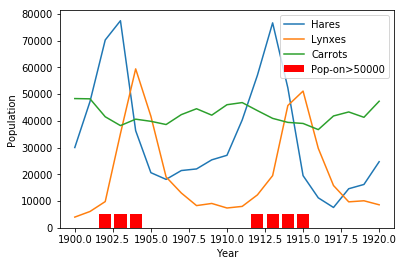

In [8]:
a = Y[np.max (np.array ([H, L, C]), axis = 0) > 50000]
print (a)
plt.plot (Y, H, label = 'Hares')
plt.plot (Y, L, label = 'Lynxes')
plt.plot (Y, C, label = 'Carrots')
plt.bar (a, 5000*np.ones (np.size (a)), label = 'Pop-on>50000', color = 'r')
plt.xlabel ("Year")
plt.ylabel ("Population")
plt.legend()
plt.show()


Find the top 2 years for each species when they had the lowest populations.

In [9]:
print ('Hares:',  *Y[np.argsort (H)][:2] )
print ('Lynxes:', *Y[np.argsort (L)][:2] )
print ('Carrots:', *Y[np.argsort (C)][:2] )

Hares: 1917 1916
Lynxes: 1900 1901
Carrots: 1916 1903



Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

correlation coefficient = -0.8494801603656876


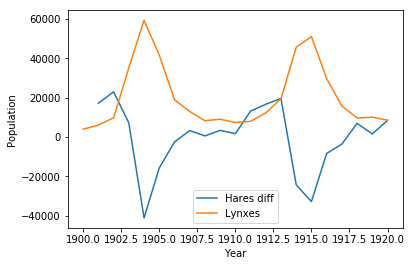

In [10]:
print ('correlation coefficient =', np.corrcoef (np.diff(H), L[1:])[1][0])
plt.plot (Y[1:], np.diff(H), label = 'Hares diff')
plt.plot (Y, L, label = 'Lynxes')
plt.xlabel ("Year")
plt.ylabel ("Population")
plt.legend()
plt.show()

Show population of hares vs carrots and hares vs lynxes.

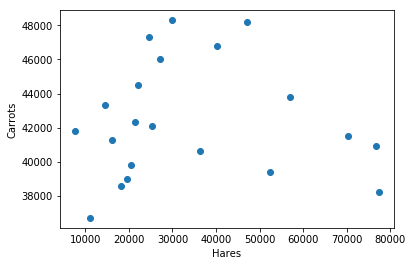

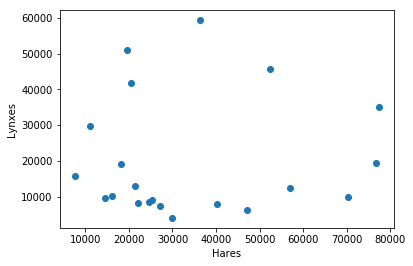

In [11]:
plt.scatter (H, C)
plt.xlabel ('Hares')
plt.ylabel ('Carrots')
plt.show()

plt.scatter (H, L)
plt.xlabel ('Hares')
plt.ylabel ('Lynxes')
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [12]:
# Применяем МНК для приближения H по L и C: Y = X*b + eps
X = np.array ([L[:-1], C[:-1]]).T
Y = H[:-1]
b = np.linalg.lstsq (X, Y)[0]
y_pred = L[-1]*b[0] + C[-1]*b[1]
print ('predicted population =', y_pred, '; real population =', H[-1])
print ('error =', np.abs (y_pred - H[-1]) / H[-1])

predicted population = 36247.04099049652 ; real population = 24700
error = 0.4674915380767822


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
